# Mount Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Import Dataset

In [ ]:
# !unzip -x '/content/drive/MyDrive/AML/UTKFace_Dataset.zip'
!unzip -x '/content/drive/MyDrive/AML_Shared/UTKFace_Dataset.zip'

Streaming output truncated to the last 5000 lines.
  inflating: utkface_aligned_cropped/crop_part1/34_1_0_20170109004755204.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_0_20170111182452832.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_1_20170103230340961.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_1_20170104011329697.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_1_20170104165020320.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_1_20170108230211421.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_2_20170104022134829.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_2_20170104023010725.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_2_20170104172537171.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_2_20170104201443273.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_2_20170104204327

# Import Libraries

In [ ]:
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input

import tensorflow as tf
from tensorflow import keras
import tensorflow_hub as hub
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [ ]:
import os
path = '/content/UTKFace'
images=[]
age=[]
gender=[]
ethnicity=[]
for img in os.listdir(path):
    if img is not None:
        temp = img.split('_')
        # print(temp)
        if(len(temp)==4):
          im = cv2.imread(path+'/'+img)
          imnew = cv2.resize(im,(100,100))
          images.append(imnew)
          age.append(int(temp[0]))
          gender.append(int(temp[1]))
          ethnicity.append(int(temp[2]))
        else:
          print(img)


61_1_20170109150557335.jpg.chip.jpg
61_1_20170109142408075.jpg.chip.jpg
39_1_20170116174525125.jpg.chip.jpg


In [ ]:
print(len(images))
print(len(age))
print(len(gender))
print(len(ethnicity))

23705
23705
23705
23705


In [ ]:
images = np.array(images)
age = np.array(age)
gender = np.array(gender)
ethnicity = np.array(ethnicity)

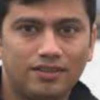

(23705, 100, 100, 3)

In [ ]:
cv2_imshow(images[3])
images.shape

In [ ]:
X,_,y,_= train_test_split(images,ethnicity,test_size=0.1,random_state=0)

In [ ]:
X=X[:1000]
y=y[:1000]

In [ ]:
X.shape

(1000, 100, 100, 3)

In [ ]:
X[0]

array([[[ 86,  82,  88],
        [ 84,  82,  88],
        [ 80,  78,  87],
        ...,
        [180, 169, 165],
        [176, 166, 159],
        [139, 129, 122]],

       [[ 87,  83,  89],
        [ 84,  82,  88],
        [ 81,  79,  88],
        ...,
        [159, 148, 144],
        [159, 149, 142],
        [137, 127, 120]],

       [[ 89,  85,  90],
        [ 84,  82,  88],
        [ 82,  80,  89],
        ...,
        [152, 143, 139],
        [148, 140, 133],
        [140, 132, 125]],

       ...,

       [[ 42,  34,  41],
        [ 40,  32,  39],
        [ 35,  27,  34],
        ...,
        [ 21,  13,  20],
        [ 20,  12,  19],
        [ 20,  12,  19]],

       [[ 38,  30,  37],
        [ 36,  28,  35],
        [ 31,  23,  30],
        ...,
        [ 20,  12,  19],
        [ 19,  11,  18],
        [ 19,  11,  18]],

       [[ 32,  24,  31],
        [ 31,  23,  30],
        [ 28,  20,  27],
        ...,
        [ 20,  12,  19],
        [ 19,  11,  18],
        [ 18,  10,  17]]

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)

In [ ]:
# for i in range(len(X_train)):
#   X_train[i]=X_train[i]/255
#   X_train[i]=preprocess_input(X_train[i])

# for i in range(len(X_test)):
#   X_test[i]=X_test[i]/255
#   X_test[i]=preprocess_input(X_test[i])

# Training Model (also crashes for small data)

In [ ]:
# vgg16 = VGG16(include_top=False, weights='imagenet')
# vgg16.trainable = False

In [ ]:
# # Checking
# for i in range(15,20):
#   cv2_imshow(images[i])
#   print(ethnicity[i])

In [ ]:
# from sklearn.model_selection import train_test_split
# X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)

In [ ]:
X_train.shape

(750, 25, 25, 3)

In [ ]:
# IMAGE_SHAPE=(224,224)
# vgg16 = tf.keras.Sequential([
#     hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4", input_shape=IMAGE_SHAPE+(3,))
# ])



import tensorflow as tf
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input

## Loading VGG16 model
base_model = VGG16(weights="imagenet", include_top=False, input_shape=images[0].shape)
base_model.trainable = False ## Not trainable weights

## Preprocessing input
X_train = preprocess_input(X_train) 
X_test = preprocess_input(X_test)

ValueError: ignored

In [ ]:
for i in range(len(X_train)):
  X_train[i]=X_train[i]/255
  # X_train[i]=preprocess_input(X_train[i])

for i in range(len(X_test)):
  X_test[i]=X_test[i]/255
  # X_test[i]=preprocess_input(X_test[i])

In [ ]:
X_train.shape

(750, 224, 224, 3)

In [ ]:
le=preprocessing.LabelEncoder()
y_train_new = le.fit_transform(y_train)
y_test_new = le.fit_transform(y_test)
y_train_new = tf.keras.utils.to_categorical(y_train_new, 5)
y_test_new = tf.keras.utils.to_categorical(y_test_new, 5)

In [ ]:
y_train.shape

(750, 5)

In [ ]:
vgg_layer = hub.KerasLayer(
    base_model,
    input_shape=(224, 224, 3),
    trainable=False)

num_classes = 5


model = tf.keras.Sequential([
  vgg_layer,
  tf.keras.layers.Flatten(),
  # tf.keras.layers.Dense(256),
  tf.keras.layers.Dense(num_classes,activation='softmax',kernel_regularizer=keras.regularizers.l2(0.0001))
])

# model = tf.keras.Sequential([
#   vgg_layer,
#   tf.keras.layers.Dense(num_classes)
# ])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 5)                 125445    
                                                                 
Total params: 14,840,133
Trainable params: 125,445
Non-trainable params: 14,714,688
_________________________________________________________________


In [ ]:
model.compile(tf.keras.optimizers.Adam(learning_rate=0.0005),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(X_train,y_train,batch_size=32,epochs=5)

Epoch 1/5
24/24 [==============================] - 17s 203ms/step - loss: 1.5719 - accuracy: 0.4053
Epoch 2/5
24/24 [==============================] - 3s 143ms/step - loss: 1.0199 - accuracy: 0.5960
Epoch 3/5
24/24 [==============================] - 3s 143ms/step - loss: 0.7667 - accuracy: 0.7387
Epoch 4/5
24/24 [==============================] - 3s 144ms/step - loss: 0.6243 - accuracy: 0.8173
Epoch 5/5
24/24 [==============================] - 3s 145ms/step - loss: 0.5120 - accuracy: 0.8827


In [ ]:
loss, accuracy = model.evaluate(X_train,y_train)

24/24 [==============================] - 4s 145ms/step - loss: 0.4543 - accuracy: 0.8800


In [ ]:
loss, accuracy = model.evaluate(X_test,y_test)

8/8 [==============================] - 3s 459ms/step - loss: 1.0850 - accuracy: 0.5960


In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

estimator = KerasClassifier(build_fn=model, epochs=5, batch_size=40, verbose=0)
kfold = KFold(n_splits=5, shuffle=True)
results = cross_val_score(estimator, X, y, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  """


INFO:tensorflow:Assets written to: ram://6522210f-e58c-4d0e-ad5e-f07fdd0614c0/assets
INFO:tensorflow:Assets written to: ram://a405b1d8-d2ac-4fac-aaa1-3994d8d37410/assets
INFO:tensorflow:Assets written to: ram://740eafe4-2d81-43cc-ab3d-6fa3efc19169/assets
INFO:tensorflow:Assets written to: ram://ed33d252-3fa5-4f2d-8631-42391a63fffd/assets
INFO:tensorflow:Assets written to: ram://62b73760-8d45-4d91-ae04-dfb0e5564f4e/assets
Baseline: nan% (nan%)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/keras/wrappers/scikit_learn.py", line 236, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/keras/wrappers/scikit_learn.py", line 153, in fit
    **self.filter_sk_params(self.build_fn.__call__))
  File "/usr/l

# Try (crashes even for small dataset)

In [ ]:
import tensorflow as tf

In [ ]:
base_model = tf.keras.applications.vgg16.VGG16(
    include_top=False,
    weights='imagenet',
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=5,
    classifier_activation='softmax'
)

In [ ]:
pretrained_model = hub.KerasLayer(base_model,input_shape=(224,224,3),trainable=False)

In [ ]:
num_of_classes = 5

model = tf.keras.Sequential([
  pretrained_model,
  tf.keras.layers.Dense(num_of_classes)
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 7, 7, 512)         14714688  
                                                                 
 dense_2 (Dense)             (None, 7, 7, 5)           2565      
                                                                 
Total params: 14,717,253
Trainable params: 2,565
Non-trainable params: 14,714,688
_________________________________________________________________


In [ ]:
model.compile(
    optimizer="adam",
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['acc'])

In [ ]:
model.fit(X_train,y_train,epochs=5)

# Scratch

In [ ]:
my_model = tf.keras.models.Sequential()
my_model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding="same",activation="relu",input_shape=[100,100,3]))
my_model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding="same", activation="relu"))
my_model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2,padding='valid'))
my_model.add(tf.keras.layers.Flatten())
my_model.add(tf.keras.layers.Dense(units=10,activation='relu'))
my_model.add(tf.keras.layers.Dropout(0.2,noise_shape=None,seed=None))
my_model.add(tf.keras.layers.Dense(units=5,activation='softmax'))
my_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 100, 100, 32)      896       
                                                                 
 conv2d_3 (Conv2D)           (None, 100, 100, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 50, 50, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 80000)             0         
                                                                 
 dense_2 (Dense)             (None, 10)                800010    
                                                                 
 dropout_1 (Dropout)         (None, 10)                0         
                                                      

In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
my_model.compile(loss='sparse_categorical_crossentropy',metrics=['accuracy'],optimizer=Adam(learning_rate=0.01))
history=my_model.fit(X_train,y_train,epochs=5,batch_size=32)

Epoch 1/5
24/24 [==============================] - 17s 666ms/step - loss: 461.4134 - accuracy: 0.2480
Epoch 2/5
24/24 [==============================] - 16s 661ms/step - loss: 1.5505 - accuracy: 0.4013
Epoch 3/5
24/24 [==============================] - 16s 661ms/step - loss: 1.5129 - accuracy: 0.4013
Epoch 4/5
24/24 [==============================] - 17s 694ms/step - loss: 1.4935 - accuracy: 0.4013
Epoch 5/5
24/24 [==============================] - 17s 717ms/step - loss: 1.4834 - accuracy: 0.4013


# Adversarial Patch

In [ ]:
pip install adversarial-robustness-toolbox

In [ ]:
from art.attacks.evasion import AdversarialPatch as patch
from art.estimators.classification import KerasClassifier

In [ ]:
import tensorflow as tf

tf.compat.v1.disable_eager_execution()

In [ ]:
# base_model.trainable=True
estimator = KerasClassifier(model=my_model, clip_values=(0,255))

In [ ]:
attack = patch(classifier=estimator,rotation_max=175,scale_min=0.05,scale_max=0.1,learning_rate=20.0,
               max_iter=10,batch_size=50)

In [ ]:
r,c=20,30
radius=5
mask = np.zeros([100,100])
for i in range(100):
  for j in range(100):
    if ((i-r)**2+(j-c)**2)<5**2:
      mask[i][j]=1
mask=mask==1
print(mask[15:25,25:35])

[[False False False False False False False False False False]
 [False False False  True  True  True  True  True False False]
 [False False  True  True  True  True  True  True  True False]
 [False  True  True  True  True  True  True  True  True  True]
 [False  True  True  True  True  True  True  True  True  True]
 [False  True  True  True  True  True  True  True  True  True]
 [False  True  True  True  True  True  True  True  True  True]
 [False  True  True  True  True  True  True  True  True  True]
 [False False  True  True  True  True  True  True  True False]
 [False False False  True  True  True  True  True False False]]


In [ ]:
y.shape

(1000,)

In [ ]:
X=X.astype(np.float32)

In [ ]:
adv_patch = attack.generate(X,y)

Adversarial Patch Numpy:   0%|          | 0/10 [00:00<?, ?it/s]

In [ ]:
patch_1=adv_patch[0]
mask_1=adv_patch[1]

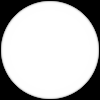

In [ ]:
cv2_imshow(mask_1*25

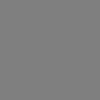

[[[127.5 127.5 127.5]
  [127.5 127.5 127.5]
  [127.5 127.5 127.5]
  ...
  [127.5 127.5 127.5]
  [127.5 127.5 127.5]
  [127.5 127.5 127.5]]

 [[127.5 127.5 127.5]
  [127.5 127.5 127.5]
  [127.5 127.5 127.5]
  ...
  [127.5 127.5 127.5]
  [127.5 127.5 127.5]
  [127.5 127.5 127.5]]

 [[127.5 127.5 127.5]
  [127.5 127.5 127.5]
  [127.5 127.5 127.5]
  ...
  [127.5 127.5 127.5]
  [127.5 127.5 127.5]
  [127.5 127.5 127.5]]

 ...

 [[127.5 127.5 127.5]
  [127.5 127.5 127.5]
  [127.5 127.5 127.5]
  ...
  [127.5 127.5 127.5]
  [127.5 127.5 127.5]
  [127.5 127.5 127.5]]

 [[127.5 127.5 127.5]
  [127.5 127.5 127.5]
  [127.5 127.5 127.5]
  ...
  [127.5 127.5 127.5]
  [127.5 127.5 127.5]
  [127.5 127.5 127.5]]

 [[127.5 127.5 127.5]
  [127.5 127.5 127.5]
  [127.5 127.5 127.5]
  ...
  [127.5 127.5 127.5]
  [127.5 127.5 127.5]
  [127.5 127.5 127.5]]]


In [ ]:
cv2_imshow(patch_1)
print(patch_1)

In [ ]:
len(np.unique(patch_1))

1

In [ ]:
patch_2 = np.random.rand(100,100,3)*255

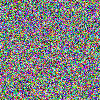

In [ ]:
cv2_imshow(patch_2)

In [ ]:
Xnew=attack.apply_patch(x=X,scale=0.4,patch_external=patch_2)
Xnew1=attack.apply_patch(x=X,scale=0.1,patch_external=patch_2)

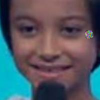

In [ ]:
cv2_imshow(Xnew1[2])

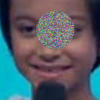

In [ ]:
cv2_imshow(Xnew[2])

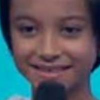

In [ ]:
cv2_imshow(X[2])

In [ ]:
ypred=my_model.predict(X)

In [ ]:
yprednew=my_model.predict(Xnew)

In [ ]:
print(ypred[1],yprednew[1])

[8.8740373e-27 1.0000000e+00 4.1682754e-36 4.0082774e-25 5.6732577e-15] [8.5371714e-27 1.0000000e+00 3.0525814e-34 2.6297598e-22 6.8127804e-15]
